In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

In [2]:
# Plot Confidence Interval
def confidence_interval(x, data, ax, hline_width = 0.02,
                        color='#2187bb', linetype='-', 
                        linewidth=2, label='label'):
    left = x - hline_width/2
    right = x + hline_width/2
    
    # median
    med = np.ma.median(data, axis=0)
    
    # 95% confidence interval
    alpha = 0.025
    data_s = np.sort(data, axis=0)
    idx = int(np.shape(data)[0]*alpha) # bottom index
    bottom = np.array([data_s[idx,k] for k in range(np.shape(data_s)[1])])
    idx = int(np.shape(data)[0]*(1-alpha)) # top index
    top = np.array([data_s[idx,k] for k in range(np.shape(data_s)[1])])
    
    ax.plot([x, x], [top, bottom], linewidth=linewidth, color=color)
    ax.plot([left, right], [top, top], '-', linewidth=linewidth, color=color)
    ax.plot([left, right], [bottom, bottom], '-', linewidth=linewidth, color=color)
    ax.plot(x, med, 'o', color=color)
    ax.plot(x,med,linestyle=linetype,linewidth=linewidth,color=color,label=label)
        
    return

In [3]:
# Plot Confidence Interval as shaded region
def CI_shaded(x, data, ax, color='#2187bb', linetype='-', 
              linewidth=2, label='label'):
    
    # median
    med = np.ma.median(data, axis=0)
    
    # 95% confidence interval
    alpha = 0.025
    data_s = np.sort(data, axis=0)
    idx = int(np.shape(data)[0]*alpha) # bottom index
    bottom = np.array([data_s[idx,k] for k in range(np.shape(data_s)[1])])
    idx = int(np.shape(data)[0]*(1-alpha)) # top index
    top = np.array([data_s[idx,k] for k in range(np.shape(data_s)[1])])

    ax.plot(x,med,linestyle=linetype,linewidth=linewidth,color=color,label=label)
    ax.plot(x, med, 'o', color=color)
    ax.fill_between(x, bottom, top, color=color, alpha=0.2)
    
    return

In [4]:
# Plot Confidence Interval as shaded region
def CI_shaded_semilogx(x, data, ax, color='#2187bb', linetype='-', 
                       linewidth=2, label='label'):
    
    # median
    med = np.ma.median(data, axis=0)
    
    # 95% confidence interval
    alpha = 0.025
    data_s = np.sort(data, axis=0)
    idx = int(np.shape(data)[0]*alpha) # bottom index
    bottom = np.array([data_s[idx,k] for k in range(np.shape(data_s)[1])])
    idx = int(np.shape(data)[0]*(1-alpha)) # top index
    top = np.array([data_s[idx,k] for k in range(np.shape(data_s)[1])])

    plt.xscale('log')
    ax.plot(x,med,linestyle=linetype,linewidth=linewidth,color=color,label=label)
    ax.fill_between(x, bottom, top, color=color, alpha=0.2)
    
    return

## Read RMSE vs Tau

In [5]:
# Bootstrapped RMSE for Nonlinear, Linear CATs, persistence,
# Climatology, divergence, and machine-precision error in ICs
try: ncfile.close()
except: pass
fname = str('CATs_L96_RMSE_vs_Tau_Nonlin-Lin-Persist-'+
'Clima-Div-MPerror_1HL_10Neurons_tau=0.1-1.0_LRcorrected.nc')
ncfile = nc.Dataset(fname,'r')

tau = ncfile.variables['tau'][:]
rmse_nonlincats = ncfile.variables['rmse_nonlincats'][:,:]
rmse_lincats = ncfile.variables['rmse_lincats'][:,:]
rmse_persist = ncfile.variables['rmse_persist'][:,:]
rmse_clima = ncfile.variables['rmse_clima'][:,:]
rmse_diverge = ncfile.variables['rmse_diverge'][:,:]
rmse_mperror = ncfile.variables['rmse_mperror'][:,:]
ncfile.close()

# Bootstrapped RMSE for ML-only
try: ncfile.close()
except: pass
fname = 'CATs_L96_RMSE_vs_Tau_MLonly_1HL_10Neurons_tau=0.1-1.0_LRcorrected.nc'
ncfile = nc.Dataset(fname,'r')
rmse_mlonly = ncfile.variables['rmse_mlonly_cats'][:,:]
ncfile.close()

# Bootstrapped RMSE for Tmr-alone
try: ncfile.close()
except: pass
fname = 'CATs_L96_RMSE_vs_Tau_Tmr-alone_2HL_10Neurons_tau=0.1-1.0_LRcorrected.nc'
ncfile = nc.Dataset(fname,'r')
rmse_tmr_alone = ncfile.variables['rmse_tmr_alone'][:,:]

ncfile.close()

## Read RMSE vs Neurons

In [6]:
# Bootstrapped RMSE for Nonlinear and Linear CATs 
# Note: Linear CATs is independent of number of 
# neurons, as it does not possess any Neural Net
try: ncfile.close()
except: pass
ncfile = nc.Dataset('CATs_L96_RMSE_vs_Neurons_Nonlin-1HL_'+
                    '5-100Neurons_tau=1_LRcorrected.nc','r')
neurons = ncfile.variables['neurons'][:]
rmse_nonlincats_nn = ncfile.variables['rmse_nonlincats'][:,:]
#rmse_lincats_nn = ncfile.variables['rmse_lincats'][:,:]
ncfile.close()

# Bootstrapped RMSE for ML-only 
ncfile = nc.Dataset('CATs_L96_RMSE_vs_Neurons_MLonly_2HL_5-100'+
                    'Neurons_tau=1_LRcorrected.nc','r')
rmse_mlonly_nn = ncfile.variables['rmse_mlonly_cats'][:,:]
ncfile.close()

# Bootstrapped RMSE for Tmr-alone configuration
ncfile = nc.Dataset('CATs_L96_RMSE_vs_Neurons_Tmr-alone_2HL_'+
                    '5-100Neurons_tau=1_LRcorrected.nc','r')
rmse_tmr_alone_nn = ncfile.variables['rmse_tmr_alone'][:,:]
ncfile.close()

###### Now for neurons between 200-400 ######
for i in [200,300,400,500]:
    nmaxpl = 100
    nhl = int(i/nmaxpl)
    ncfile = nc.Dataset(f'CATs_L96_RMSE_vs_Neurons_Nonlin-{nhl}HL_'+
                        f'{i}Neurons_tau=1_LRcorrected.nc','r')
    temp = ncfile.variables['rmse_nonlincats'][:,:]
    rmse_nonlincats_nn = np.append(rmse_nonlincats_nn,temp,0) 
    ncfile.close()
    
    ncfile = nc.Dataset(f'CATs_L96_RMSE_vs_Neurons_MLonly_{nhl}HL_'+
                        f'{i}Neurons_tau=1_LRcorrected.nc','r')
    temp = ncfile.variables['rmse_mlonly_cats'][:,:]
    rmse_mlonly_nn = np.append(rmse_mlonly_nn,temp,0) 
    ncfile.close()
    
    ncfile = nc.Dataset(f'CATs_L96_RMSE_vs_Neurons_Tmr-alone_'+
                        f'{nhl}HL_{i}Neurons_tau=1_LRcorrected.nc','r')
    temp = ncfile.variables['rmse_tmr_alone'][:,:]
    rmse_tmr_alone_nn = np.append(rmse_tmr_alone_nn,temp,0) 
    ncfile.close()
    
neurons = np.append(neurons,[200,300,400,500])

In [9]:
# Load data for 5000 neurons
ncfile = nc.Dataset('CATs_L96_RMSE_vs_Neurons_Nonlin-10HL_'+
                    '5000Neurons_tau=1_LRcorrected.nc','r')
temp = ncfile.variables['rmse_nonlincats'][:,:]
rmse_nonlincats_nn = np.append(rmse_nonlincats_nn,temp,0) 
ncfile.close()
    
ncfile = nc.Dataset('CATs_L96_RMSE_vs_Neurons_MLonly_10HL_'+
                    '5000Neurons_tau=1_LRcorrected.nc','r')
temp = ncfile.variables['rmse_mlonly_cats'][:,:]
rmse_mlonly_nn = np.append(rmse_mlonly_nn,temp,0) 
ncfile.close()
    
ncfile = nc.Dataset('CATs_L96_RMSE_vs_Neurons_Tmr-alone_'+
                    '10HL_5000Neurons_tau=1_LRcorrected.nc','r')
temp = ncfile.variables['rmse_tmr_alone'][:,:]
rmse_tmr_alone_nn = np.append(rmse_tmr_alone_nn,temp,0) 
ncfile.close()

neurons = np.append(neurons,[5000])

### Plot the confidence intervals

In [13]:
np.shape(rmse_nonlincats)

(10, 1000)

# %matplotlib inline
import string 
# Define the figure axes
fig = plt.figure(figsize=[15,15])

# define the grid 
grid_ = plt.GridSpec(2, 20, wspace=0.15, hspace=0.15)

#--------------------------------------------
##### First panel of bootstrapped RMSE ######
#--------------------------------------------
ax1 = fig.add_subplot(grid_[0,2:18])
h0 = confidence_interval(tau,rmse_mperror.T, ax=ax1, color='k', 
                         linetype='--', linewidth=1, label='Machine-precision Error')
h1 = confidence_interval(tau,rmse_nonlincats.T, ax=ax1, color='C2', 
                         linetype='-', linewidth=2, label='Nonlinear CATs')
h2 = confidence_interval(tau,rmse_mlonly.T, ax=ax1, color='C5', 
                         linetype='-', linewidth=2, label='ML-only')
h3 = confidence_interval(tau,rmse_lincats.T, ax=ax1, color='C3', 
                         linetype='-', linewidth=2, label='Linear CATs')
h4 = confidence_interval(tau,rmse_persist.T, ax=ax1, color='C4', 
                         linetype='-', linewidth=2, label='Persistence')
h5 = confidence_interval(tau,rmse_tmr_alone.T, ax=ax1, color='C6', 
                         linetype='-', linewidth=2, label='$T_{mr}$-alone')
h6 = confidence_interval(tau,rmse_clima.T, ax=ax1, color='C0', 
                         linetype='--', linewidth=1, label='Climatology')
h7 = confidence_interval(tau,rmse_diverge.T, ax=ax1, color='r', 
                         linetype='--', linewidth=1, label='Divergence')

#ax1.set_title(f"RMSE vs Lead Time", fontsize=16)
ax1.grid(linestyle='--')
ax1.set_xlabel('Lead time (in MTUs)',fontsize=12)
ax1.set_ylabel('RMSE',fontsize=12)
ax1.tick_params(axis='both',labelsize=12)
plt.legend(fontsize=12)
#plt.legend(bbox_to_anchor=(0, 1), fontsize=12,loc='upper left')

#----------------------------------------------
##### Last two panels of bootstrapped RMSE ####
##### as a function of number of neurons ######
#----------------------------------------------
ax2 = fig.add_subplot(grid_[1,:9])
ax2.semilogx(neurons,np.ma.median(rmse_nonlincats_nn,axis=1),linewidth=2,
         color='C2',label='Nonlinear CATs')
ax2.semilogx(neurons,np.ma.median(rmse_mlonly_nn,axis=1),linewidth=2,
         color='C5',label='ML-only')
ax2.semilogx(neurons,np.ma.median(rmse_tmr_alone_nn,axis=1),linewidth=2,
         color='C6',label='Tmr-alone')
ax2.set_xlabel('Number of Neurons',fontsize=12)
ax2.set_ylabel('RMSE',fontsize=12)
ax2.grid(linestyle='--')
ax2.tick_params(axis='both',labelsize=12)
plt.legend(fontsize=12)

ax3 = fig.add_subplot(grid_[1,11:])
rmse_perch1 = (np.ma.median(rmse_nonlincats_nn,axis=1) - np.ma.median(
    rmse_mlonly_nn,axis=1))/np.ma.median(rmse_mlonly_nn,axis=1)

rmse_perch2 = (np.ma.median(rmse_tmr_alone_nn,axis=1) - \
np.ma.median(rmse_mlonly_nn,axis=1))/np.ma.median(rmse_mlonly_nn,axis=1)

ax3.semilogx(neurons,rmse_perch1,linewidth=2,label='Nonlinear CATs - MLonly')
ax3.semilogx(neurons,rmse_perch2,linewidth=2,label='Tmr-alone - MLonly')
ax3.semilogx(neurons,np.repeat(0,len(neurons)),'--k',linewidth=3,alpha=0.5)
ax3.set_xlabel('Number of Neurons',fontsize=12)
ax3.set_ylabel('Norm. RMSE diff.',fontsize=12)
ax3.grid(linestyle='--')
ax3.tick_params(axis='both',labelsize=12)
plt.legend(fontsize=12)

#plt.savefig('CATs_L96_RMSE_vs_Tau_Neurons.jpeg',dpi=400)
plt.show()

### Shade the confidence intervals

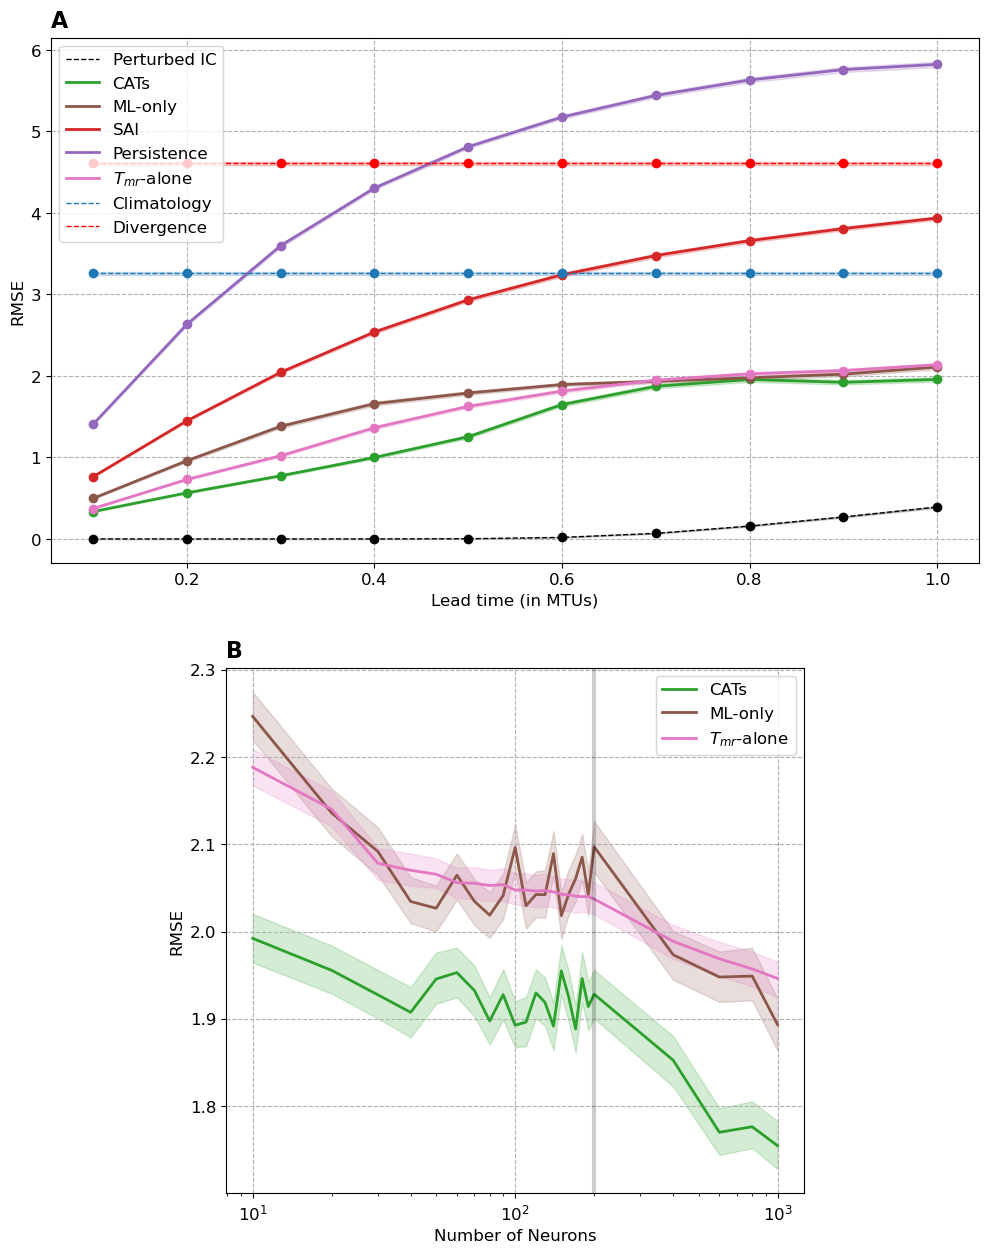

In [14]:
%matplotlib inline
import string 
# Define the figure axes
fig = plt.figure(figsize=[15,15])

# define the grid 
grid_ = plt.GridSpec(2, 20, wspace=0.15, hspace=0.2)

#--------------------------------------------
##### First panel of bootstrapped RMSE ######
#--------------------------------------------
ax1 = fig.add_subplot(grid_[0,2:18])
h0 = CI_shaded(tau,rmse_mperror.T, ax=ax1, color='k', 
               linetype='--', linewidth=1, label='Perturbed IC')
h1 = CI_shaded(tau,rmse_nonlincats.T, ax=ax1, color='C2', 
               linetype='-', linewidth=2, label='CATs')
h2 = CI_shaded(tau,rmse_mlonly.T, ax=ax1, color='C5', 
               linetype='-', linewidth=2, label='ML-only')
h3 = CI_shaded(tau,rmse_lincats.T, ax=ax1, color='C3', 
               linetype='-', linewidth=2, label='SAI')
h4 = CI_shaded(tau,rmse_persist.T, ax=ax1, color='C4', 
               linetype='-', linewidth=2, label='Persistence')
h5 = CI_shaded(tau,rmse_tmr_alone.T, ax=ax1, color='C6', 
               linetype='-', linewidth=2, label='$T_{mr}$-alone')
h6 = CI_shaded(tau,rmse_clima.T, ax=ax1, color='C0', 
               linetype='--', linewidth=1, label='Climatology')
h7 = CI_shaded(tau,rmse_diverge.T, ax=ax1, color='r', 
               linetype='--', linewidth=1, label='Divergence')

#ax1.set_title(f"RMSE vs Lead Time", fontsize=16)
ax1.grid(linestyle='--')
ax1.set_xlabel('Lead time (in MTUs)',fontsize=12)
ax1.set_ylabel('RMSE',fontsize=12)
ax1.tick_params(axis='both',labelsize=12)
plt.legend(fontsize=12)
ax1.text(0., 1.02, string.ascii_uppercase[0], transform=ax1.transAxes, 
         size=16, weight='bold')
#plt.legend(bbox_to_anchor=(0, 1), fontsize=12,loc='upper left')

#----------------------------------------------
##### Last two panels of bootstrapped RMSE ####
##### as a function of number of neurons ######
#----------------------------------------------

ax2 = fig.add_subplot(grid_[1,5:15])
CI_shaded_semilogx(2*neurons,rmse_nonlincats_nn.T, ax=ax2, color='C2',
                   linetype='-', linewidth=2, label=r'CATs')
CI_shaded_semilogx(2*neurons,rmse_mlonly_nn.T, ax=ax2, color='C5',
                   linetype='-', linewidth=2, label=r'ML-only')
CI_shaded_semilogx(2*neurons,rmse_tmr_alone_nn.T, ax=ax2, color='C6',
          linetype='-', linewidth=2, label=r'$T_{mr}$-alone')
ax2.axvline(x=200,color='k',linewidth=3,alpha=0.2)
ax2.set_xlabel('Number of Neurons',fontsize=12)
ax2.set_ylabel('RMSE',fontsize=12)
ax2.grid(linestyle='--')
ax2.tick_params(axis='both',labelsize=12)
plt.legend(fontsize=12)
ax2.text(0, 1.02, string.ascii_uppercase[1], transform=ax2.transAxes, 
         size=16, weight='bold')

#-----------------------------------------------

#ax3 = fig.add_subplot(grid_[1,11:])

#rmse_perch1 = (rmse_nonlincats_nn - rmse_mlonly_nn)/rmse_mlonly_nn
#rmse_perch2 = (rmse_tmr_alone_nn - rmse_mlonly_nn)/rmse_mlonly_nn

#CI_shaded_semilogx(2*neurons,rmse_perch1.T, ax=ax3, color='C2',
#          linetype='-', linewidth=2, label=r'CATs $-$ ML-only')
#CI_shaded_semilogx(2*neurons,rmse_perch2.T, ax=ax3, color='C6',
#          linetype='-', linewidth=2, label=r'Tmr-alone $-$ ML-only')
#ax3.semilogx(neurons,np.repeat(0,len(neurons)),'--k',linewidth=3,alpha=0.5)
#ax3.axvline(x=200,color='k',linewidth=3,alpha=0.2)
#ax3.set_xlabel('Number of Neurons',fontsize=12)
#ax3.set_ylabel('Norm. RMSE diff.',fontsize=12)
#ax3.grid(linestyle='--')
#ax3.tick_params(axis='both',labelsize=12)
#plt.legend(fontsize=12)
#ax3.text(0, 1.02, string.ascii_uppercase[2], transform=ax3.transAxes, 
#         size=16, weight='bold')

plt.savefig('CATs_L96_RMSE_vs_Tau_Neurons_CI_shaded_LRcorrected.png',dpi=300)
#plt.savefig('CATs_L96_RMSE_vs_Tau_Neurons_CI_shaded_LRcorrected.eps',format='eps')
plt.show()

### Plot the medians

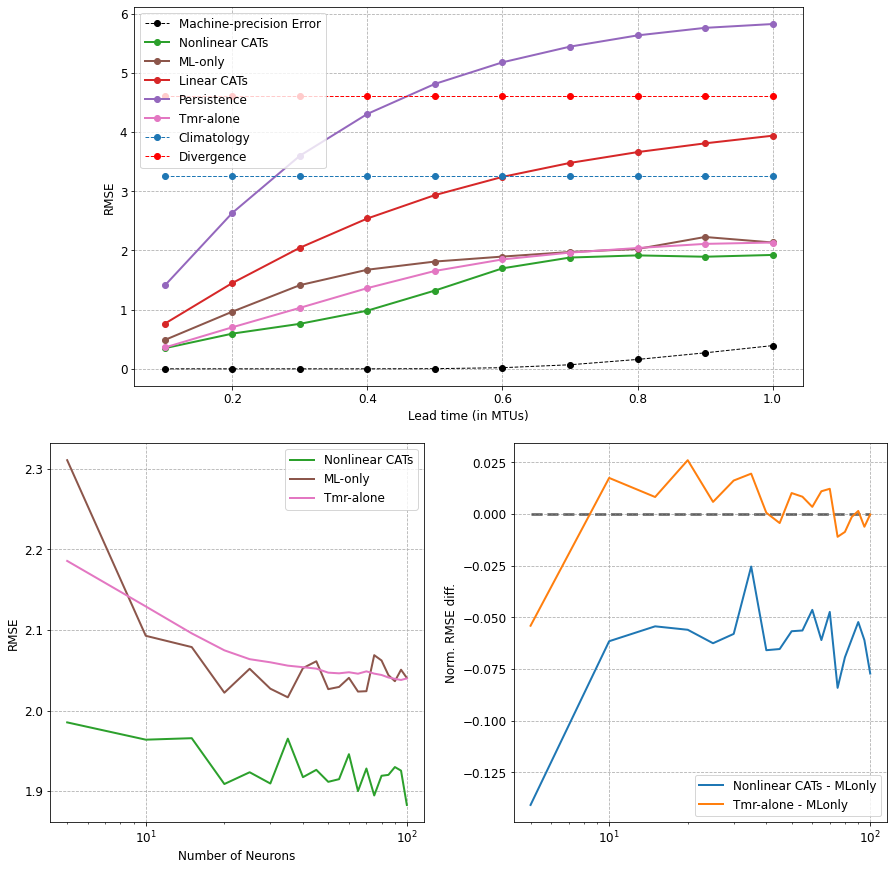

In [47]:
%matplotlib inline
import string 
# Define the figure axes
fig = plt.figure(figsize=[15,15])

# define the grid 
grid_ = plt.GridSpec(2, 20, wspace=0.15, hspace=0.15)

#--------------------------------------------
##### First panel of bootstrapped RMSE ######
#--------------------------------------------
ax1 = fig.add_subplot(grid_[0,2:18])
ax1.plot(tau,np.ma.median(rmse_mperror,axis=1), '--ko', 
         linewidth=1, label='Machine-precision Error')
ax1.plot(tau,np.ma.median(rmse_nonlincats,axis=1), '-C2o', 
         linewidth=2, label='Nonlinear CATs')
ax1.plot(tau,np.ma.median(rmse_mlonly,axis=1), '-C5o', 
         linewidth=2, label='ML-only')
ax1.plot(tau,np.ma.median(rmse_lincats,axis=1), '-C3o', 
         linewidth=2, label='Linear CATs')
ax1.plot(tau,np.ma.median(rmse_persist,axis=1), '-C4o', 
         linewidth=2, label='Persistence')
ax1.plot(tau,np.ma.median(rmse_tmr_alone,axis=1), '-C6o', 
         linewidth=2, label='Tmr-alone')
ax1.plot(tau,np.ma.median(rmse_clima,axis=1), '--C0o', 
         linewidth=1, label='Climatology')
ax1.plot(tau,np.ma.median(rmse_diverge,axis=1),'--ro', 
         linewidth=1, label='Divergence')

#ax1.set_title(f"RMSE vs Lead Time", fontsize=16)
ax1.grid(linestyle='--')
ax1.set_xlabel('Lead time (in MTUs)',fontsize=12)
ax1.set_ylabel('RMSE',fontsize=12)
ax1.tick_params(axis='both',labelsize=12)
plt.legend(fontsize=12)
#plt.legend(bbox_to_anchor=(0, 1), fontsize=12,loc='upper left')

#----------------------------------------------
##### Last two panels of bootstrapped RMSE ####
##### as a function of number of neurons ######
#----------------------------------------------

ax2 = fig.add_subplot(grid_[1,:9])
ax2.semilogx(neurons,np.ma.median(rmse_nonlincats_nn,axis=1),linewidth=2,
         color='C2',label='Nonlinear CATs')
ax2.semilogx(neurons,np.ma.median(rmse_mlonly_nn,axis=1),linewidth=2,
         color='C5',label='ML-only')
ax2.semilogx(neurons,np.ma.median(rmse_tmr_alone_nn,axis=1),linewidth=2,
         color='C6',label='Tmr-alone')
ax2.set_xlabel('Number of Neurons',fontsize=12)
ax2.set_ylabel('RMSE',fontsize=12)
ax2.grid(linestyle='--')
ax2.tick_params(axis='both',labelsize=12)
plt.legend(fontsize=12)

ax3 = fig.add_subplot(grid_[1,11:])
rmse_perch1 = (np.ma.median(rmse_nonlincats_nn,axis=1) - \
np.ma.median(rmse_mlonly_nn,axis=1))/np.ma.median(rmse_mlonly_nn,axis=1)

rmse_perch2 = (np.ma.median(rmse_tmr_alone_nn,axis=1) - \
np.ma.median(rmse_mlonly_nn,axis=1))/np.ma.median(rmse_mlonly_nn,axis=1)

ax3.semilogx(neurons,np.repeat(0,len(neurons)),'--k',linewidth=3,alpha=0.5)
ax3.semilogx(neurons,rmse_perch1,linewidth=2,label='Nonlinear CATs - MLonly')
ax3.semilogx(neurons,rmse_perch2,linewidth=2,label='Tmr-alone - MLonly')
ax3.grid(linestyle='--')
ax3.tick_params(axis='both',labelsize=12)
ax3.set_ylabel('Norm. RMSE diff.',fontsize=12)
plt.legend(fontsize=12)

plt.savefig('CATs_L96_RMSE_vs_Tau_Neurons_median.jpeg',dpi=400)
plt.show()

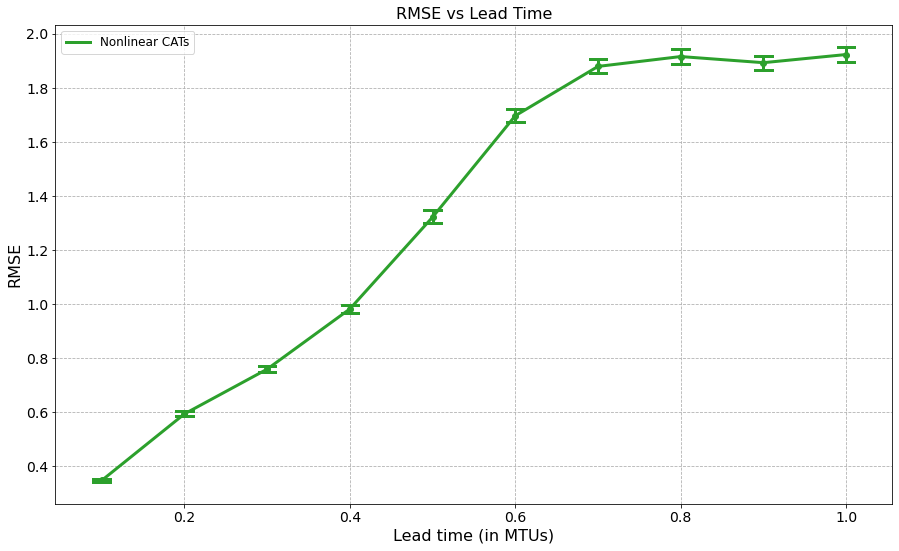

In [33]:
# Plot for any one method to visualize the confidence interval 
%matplotlib inline
import string 
# Define the figure axes
fig = plt.figure(figsize=[15,20])

# define the grid 
grid_ = plt.GridSpec(18, 5, wspace=0.05, hspace=0.15)

##### First two panels of bootstrapped correlations ######
#----------------------------------------------------------
ax1 = fig.add_subplot(grid_[:8,:])
#h0 = confidence_interval(tau,rmse_mperror.T, ax=ax1, color='k', 
#                         linetype='--', linewidth=1, label='Machine-precision Error')
h1 = confidence_interval(tau,rmse_nonlincats.T, ax=ax1, color='C2', 
                         linetype='-', linewidth=3, label='Nonlinear CATs')
#h2 = confidence_interval(tau,rmse_mlonly.T, ax=ax1, color='C5', 
#                         linetype='-', linewidth=3, label='ML-only')
#h3 = confidence_interval(tau,rmse_lincats.T, ax=ax1, color='C3', 
#                         linetype='-', linewidth=3, label='Linear CATs')

ax1.set_title(f"RMSE vs Lead Time", fontsize=16)
ax1.grid(linestyle='--')
ax1.set_xlabel('Lead time (in MTUs)', fontsize=16)
ax1.set_ylabel('RMSE', fontsize=16)
ax1.tick_params(axis='both',labelsize=14)
plt.legend(bbox_to_anchor=(0, 1), fontsize=12,loc='upper left')
plt.show()

### Plot RMSE for all methods up to 4MTU

In [36]:
# Read bootstrapped RMSE for all models except ML-only
try: ncfile.close()
except: pass

ncfile = nc.Dataset('CATs_L96_RMSE_vs_Tau_Nonlin-Lin-Persist-'+
                    'Clima-Div-MPerror_1HL_10Neurons_tau=0.2-4.0.nc','r')

tau = ncfile.variables['tau'][:]
rmse_nonlincats_long = ncfile.variables['rmse_nonlincats'][:,:]
rmse_lincats_long = ncfile.variables['rmse_lincats'][:,:]
rmse_persist_long = ncfile.variables['rmse_persist'][:,:]
rmse_clima_long = ncfile.variables['rmse_clima'][:,:]
rmse_diverge_long = ncfile.variables['rmse_diverge'][:,:]
rmse_mperror_long = ncfile.variables['rmse_mperror'][:,:]
ncfile.close()

ncfile = nc.Dataset('CATs_L96_RMSE_vs_Tau_MLonly_1HL_10Neurons_tau=0.2-4.0.nc','r')
rmse_mlonly_long = ncfile.variables['rmse_mlonly_cats'][:,:]

ncfile.close()

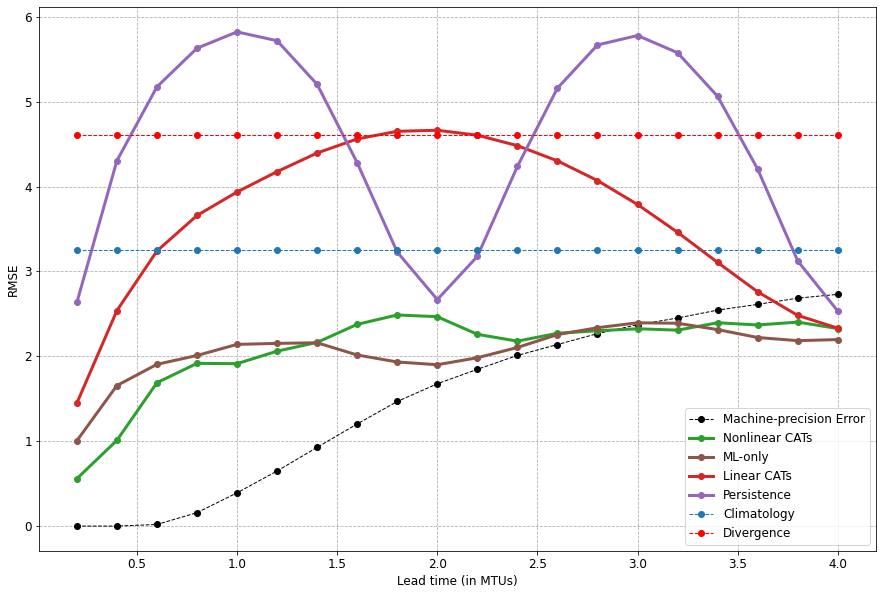

In [37]:
# Define the figure axes
fig = plt.figure(figsize=[15,10])

#--------------------------------------------
##### First panel of bootstrapped RMSE ######
#--------------------------------------------
ax1 = fig.add_subplot(1,1,1)
ax1.plot(tau,np.ma.median(rmse_mperror_long,axis=1), '--ko', 
         linewidth=1, label='Machine-precision Error')
ax1.plot(tau,np.ma.median(rmse_nonlincats_long,axis=1), '-C2o', 
         linewidth=3, label='Nonlinear CATs')
ax1.plot(tau,np.ma.median(rmse_mlonly_long,axis=1), '-C5o', 
         linewidth=3, label='ML-only')
ax1.plot(tau,np.ma.median(rmse_lincats_long,axis=1), '-C3o', 
         linewidth=3, label='Linear CATs')
ax1.plot(tau,np.ma.median(rmse_persist_long,axis=1), '-C4o', 
         linewidth=3, label='Persistence')
ax1.plot(tau,np.ma.median(rmse_clima_long,axis=1), '--C0o', 
         linewidth=1, label='Climatology')
ax1.plot(tau,np.ma.median(rmse_diverge_long,axis=1),'--ro', 
         linewidth=1, label='Divergence')

#ax1.set_title(f"RMSE vs Lead Time", fontsize=16)
ax1.grid(linestyle='--')
ax1.set_xlabel('Lead time (in MTUs)',fontsize=12)
ax1.set_ylabel('RMSE',fontsize=12)
ax1.tick_params(axis='both',labelsize=12)
plt.legend(fontsize=12)
plt.savefig('CATs_L96_RMSE_vs_Tau_Neurons_median_tau=0.2-4.0.jpeg',dpi=400)
plt.show()